# Modelado

## Selecci√≥n de la t√©cnica de modelado


In [1]:
import pandas as pd

data = pd.read_excel('data_final.xlsx')

In [3]:
data = data.drop('C√ìDIGO SINIESTRO', axis=1)

In [4]:
data

DISTRITO  TIPO PERSONA  GRAVEDAD  EDAD       SEXO          VEH√çCULO  \
0         PACCHO     CONDUCTOR         0    28  MASCULINO         AUTOM√ìVIL   
1         PACCHO  NO CONDUCTOR         1    72  MASCULINO         AUTOM√ìVIL   
2         PACCHO  NO CONDUCTOR         0    19   FEMENINO         AUTOM√ìVIL   
3         PACCHO  NO CONDUCTOR         0    19   FEMENINO         AUTOM√ìVIL   
4         PACCHO  NO CONDUCTOR         0    27  MASCULINO         AUTOM√ìVIL   
...          ...           ...       ...   ...        ...               ...   
3532  LOS OLIVOS     CONDUCTOR         0    25  MASCULINO       MOTOCICLETA   
3533        LIMA     CONDUCTOR         0    35  MASCULINO  TRIMOTO PASAJERO   
3534        LIMA        PEAT√ìN         1    39  MASCULINO  TRIMOTO PASAJERO   
3535  LOS OLIVOS     CONDUCTOR         0    27  MASCULINO              OTRO   
3536  LOS OLIVOS        PEAT√ìN         1    70  MASCULINO              OTRO   

          DIA  HORA TIPO DE V√çA ZONIFICACI√ìN CARACTER√çSTICAS DE V√çA  \
0     DOMINGO    16   CARRETERA        RURAL                   OTRO   
1     DOMINGO    16   CARRETERA        RURAL                   OTRO   
2     DOMINGO    16   CARRETERA        RURAL                   OTRO   
3     DOMINGO    16   CARRETERA        RURAL                   OTRO   
4     DOMINGO    16   CARRETERA        RURAL                   OTRO   
...       ...   ...         ...          ...                    ...   
3532   S√ÅBADO    20     AVENIDA    COMERCIAL            TRAMO RECTO   
3533  DOMINGO    22     AVENIDA    COMERCIAL           INTERSECCI√ìN   
3534  DOMINGO    22     AVENIDA    COMERCIAL           INTERSECCI√ìN   
3535    LUNES    10     AVENIDA    COMERCIAL                   OTRO   
3536    LUNES    10     AVENIDA    COMERCIAL                   OTRO   

     ESTADO MODALIDAD  POSEE LICENCIA  
0          HABILITADO               1  
1          HABILITADO               0  
2          HABILITADO               0  
3          HABILITADO               0  
4          HABILITADO               0  
...               ...             ...  
3532   NO CORRESPONDE               0  
3533    NO HABILITADO               0  
3534    NO HABILITADO               0  
3535       HABILITADO               0  
3536       HABILITADO               0  

[3537 rows x 13 columns]

In [15]:
from sklearn.preprocessing import OneHotEncoder

# Suponiendo que tu DataFrame se llama data_modelado
data_modelado = data.copy()

# 1. Convertir SEXO a binaria
data_modelado['SEXO'] = data_modelado['SEXO'].map({'MASCULINO': 1, 'FEMENINO': 0})

In [17]:
from sklearn.compose import ColumnTransformer
# Columnas
columnas_numericas = ['EDAD', 'HORA']
columnas_categoricas = categoricas_multiclase  # Ya definida antes
columnas_binarias = ['SEXO']  # Ya est√° binarizada, no necesita transformaci√≥n

# Preprocesador mejorado
preprocesador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), columnas_numericas),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), columnas_categoricas)
], remainder='passthrough')  

In [26]:
!pip install scikit-plot

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import time

In [18]:
X = data_modelado.drop(columns=['GRAVEDAD']) 
y = data_modelado['GRAVEDAD']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
modelos = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

In [21]:
def evaluar_modelo(nombre, modelo):
    pipeline = Pipeline([
        ('preprocesamiento', preprocesador),
        ('modelo', modelo)
    ])
    start = time.time()
    pipeline.fit(X_train, y_train)
    tiempo = time.time() - start
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    return nombre, acc, f1, auc, tiempo

In [22]:
resultados = []
for nombre, modelo in modelos.items():
    res = evaluar_modelo(nombre, modelo)
    resultados.append(res)

resultados_df = pd.DataFrame(resultados, columns=['Modelo', 'Accuracy', 'F1-score', 'ROC-AUC', 'Tiempo (s)'])
print(resultados_df.sort_values(by='F1-score', ascending=False))

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning:

               Modelo  Accuracy  F1-score   ROC-AUC  Tiempo (s)
1       Decision Tree  0.872881  0.842105  0.872996    0.099941
2       Random Forest  0.870056  0.837456  0.941628    1.604169
4                 SVM  0.816384  0.756554  0.884804    2.299463
0  LogisticRegression  0.796610  0.722008  0.859906    0.092733
3                 KNN  0.747175  0.644135  0.803152    0.020968


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [23]:
modelos = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

In [25]:
parametros_grid = {
    'Random Forest': {
        'modelo__n_estimators': [100, 200, 300],
        'modelo__max_depth': [10, 20, None],
        'modelo__min_samples_split': [2, 5, 10]
    },
    'Decision Tree': {
        'modelo__max_depth': [5, 10, 20, None],
        'modelo__min_samples_split': [2, 5, 10],
        'modelo__criterion': ['gini', 'entropy']
    },
    'LogisticRegression': {
        'modelo__C': [0.01, 0.1, 1, 10],
        'modelo__penalty': ['l1', 'l2'],
        'modelo__solver': ['liblinear', 'saga']
    }
}

In [27]:
# DataFrame para guardar resultados
resultados_grid = []

# Comparaci√≥n de modelos con b√∫squeda en cuadr√≠cula
for nombre, modelo in modelos.items():
    print(f"üîç Optimizando {nombre}...")
    pipeline = Pipeline([
        ('preprocesamiento', preprocesador),
        ('modelo', modelo)
    ])
    
    grid_search = GridSearchCV(pipeline,
                               parametros_grid[nombre],
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=0)
    
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    tiempo = time.time() - start_time

    y_pred = grid_search.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    resultados_grid.append({
        'Modelo': nombre,
        'Accuracy': acc,
        'F1-score': f1,
        'ROC-AUC': roc,
        'Tiempo (s)': tiempo,
        'Mejores Par√°metros': grid_search.best_params_
    })

# Mostrar resultados en un DataFrame ordenado por F1-score
df_resultados_grid = pd.DataFrame(resultados_grid).sort_values(by='F1-score', ascending=False)
print("\nüîé Resultados con GridSearchCV:")
print(df_resultados_grid)

üîç Optimizando Random Forest...


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


üîç Optimizando Decision Tree...


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


üîç Optimizando LogisticRegression...

üîé Resultados con GridSearchCV:
               Modelo  Accuracy  F1-score   ROC-AUC  Tiempo (s)  \
0       Random Forest  0.878531  0.848057  0.872589   74.120919   
1       Decision Tree  0.871469  0.844444  0.870686    2.428910   
2  LogisticRegression  0.795198  0.717349  0.770798    4.026603   

                                  Mejores Par√°metros  
0  {'modelo__max_depth': None, 'modelo__min_sampl...  
1  {'modelo__criterion': 'entropy', 'modelo__max_...  
2  {'modelo__C': 0.1, 'modelo__penalty': 'l1', 'm...  


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


üéØ Visualizando Random Forest


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


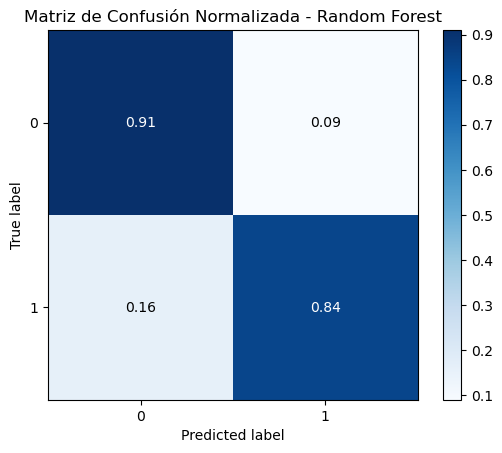

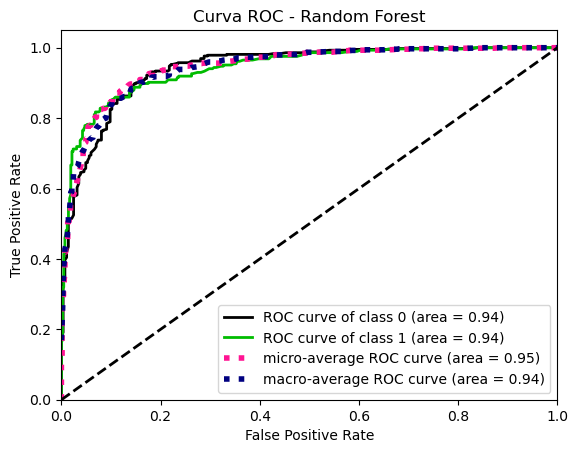

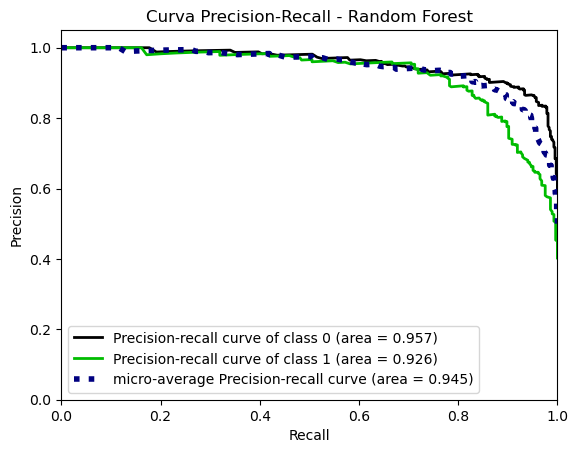

üéØ Visualizando Decision Tree


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


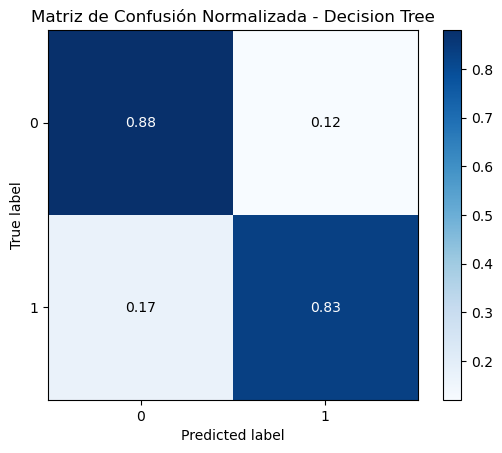

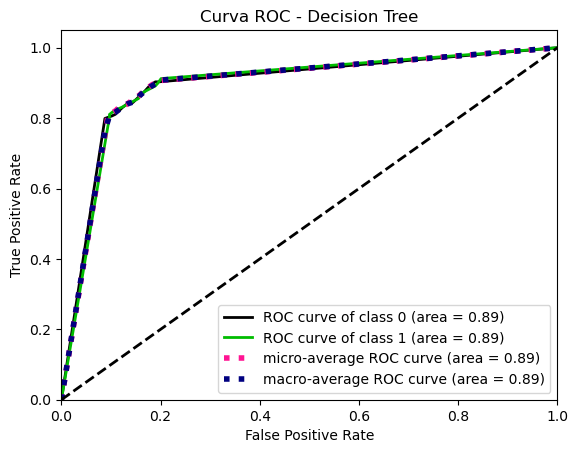

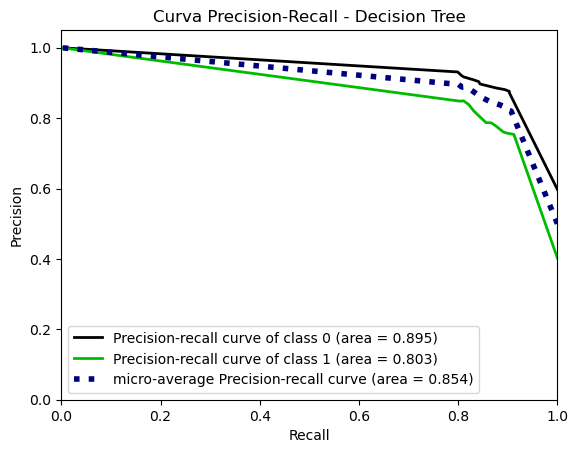

In [28]:
import scikitplot as skplt
import matplotlib.pyplot as plt

# Entrenamos los dos modelos con los mejores par√°metros encontrados
mejores_modelos = {
    'Random Forest': RandomForestClassifier(
        max_depth=None,
        min_samples_split=2,
        n_estimators=300,
        random_state=42
    ),
    'Decision Tree': DecisionTreeClassifier(
        criterion='entropy',
        max_depth=20,
        min_samples_split=5,
        random_state=42
    )
}

for nombre, modelo in mejores_modelos.items():
    print(f"üéØ Visualizando {nombre}")
    
    # Creamos el pipeline
    pipeline = Pipeline([
        ('preprocesamiento', preprocesador),
        ('modelo', modelo)
    ])
    
    # Entrenamos
    pipeline.fit(X_train, y_train)
    
    # Predicciones
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)
    
    # 1Ô∏è‚É£ Matriz de confusi√≥n normalizada
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
    plt.title(f'Matriz de Confusi√≥n Normalizada - {nombre}')
    plt.show()
    
    # 2Ô∏è‚É£ Curva ROC
    skplt.metrics.plot_roc(y_test, y_proba)
    plt.title(f'Curva ROC - {nombre}')
    plt.show()

    # 3Ô∏è‚É£ Curva Precision-Recall
    skplt.metrics.plot_precision_recall(y_test, y_proba)
    plt.title(f'Curva Precision-Recall - {nombre}')
    plt.show()

## Construcci√≥n del modelo

In [ ]:
# Crear el model
modelo_final = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=10,
    random_state=42
)

# Crear el pipeline con escalador y el modelo
pipeline_final = Pipeline([
    ('scaler', StandardScaler()),
    ('modelo', modelo_final)
])

# Entrenar el modelo final
pipeline_final.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('modelo',
                 RandomForestClassifier(min_samples_split=10,
                                        random_state=42))])

In [ ]:
# Predicciones
y_pred = pipeline_final.predict(X_test)
y_proba = pipeline_final.predict_proba(X_test)[:, 1]

# Evaluaciones
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print("üîç Evaluaci√≥n del modelo final - Random Forest:")
print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")
print("\nüîç Reporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred))

üîç Evaluaci√≥n del modelo final - Random Forest:
Accuracy: 0.8418
F1-score: 0.7971
ROC-AUC: 0.9158

üîç Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       423
           1       0.82      0.77      0.80       285

    accuracy                           0.84       708
   macro avg       0.84      0.83      0.83       708
weighted avg       0.84      0.84      0.84       708



In [ ]:
def optimizar_random_forest(X_train, y_train, X_test, y_test):
    # Hiperpar√°metros a probar
    parametros = {
        'modelo__n_estimators': [100, 200, 300],
        'modelo__max_depth': [10, 20, None],
        'modelo__min_samples_split': [2, 5, 10],
        'modelo__max_features': ['sqrt', 'log2'],
        'modelo__class_weight': [None, 'balanced']
    }

    # Pipeline con escalador y Random Forest
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('modelo', RandomForestClassifier(random_state=42))
    ])

    # GridSearchCV para encontrar la mejor combinaci√≥n
    grid = GridSearchCV(pipeline, parametros, 
                        cv=5, 
                        scoring='f1',  # Puedes cambiar a 'accuracy' o 'roc_auc' si prefieres
                        n_jobs=-1,
                        verbose=1)

    # Tiempo de ejecuci√≥n
    inicio = time.time()
    grid.fit(X_train, y_train)
    fin = time.time()

    # Mejor modelo
    mejor_modelo = grid.best_estimator_
    y_pred = mejor_modelo.predict(X_test)
    y_prob = mejor_modelo.predict_proba(X_test)[:, 1]

    # M√©tricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    print("\n‚úÖ Mejor configuraci√≥n encontrada:")
    print(grid.best_params_)
    print(f"\nüß™ Resultados en test set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc:.4f}")
    print(f"‚è±Ô∏è Tiempo total de b√∫squeda: {fin - inicio:.2f} segundos")

    return mejor_modelo

In [ ]:
modelo_final_rf = optimizar_random_forest(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

‚úÖ Mejor configuraci√≥n encontrada:
{'modelo__class_weight': None, 'modelo__max_depth': None, 'modelo__max_features': 'sqrt', 'modelo__min_samples_split': 2, 'modelo__n_estimators': 300}

üß™ Resultados en test set:
Accuracy: 0.8672
F1-score: 0.8333
ROC AUC: 0.9429
‚è±Ô∏è Tiempo total de b√∫squeda: 144.66 segundos


In [29]:
# Modelo final con los mejores hiperpar√°metros
modelo_final_rf = Pipeline([
    ('preprocesamiento', preprocesador),
    ('modelo', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        max_features='sqrt',
        class_weight=None,
        random_state=42
    ))
])

# Entrenamiento final
modelo_final_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['EDAD', 'HORA']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['DISTRITO', 'TIPO PERSONA',
                                                   'VEH√çCULO', 'DIA',
                                                   'TIPO DE V√çA',
                                                   'ZONIFICACI√ìN',
                                                   'CARACTER√çSTICAS DE V√çA',
                                                   'ESTADO MODALIDAD'])])),
                ('modelo',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [30]:
y_pred_final = modelo_final_rf.predict(X_test)
y_prob_final = modelo_final_rf.predict_proba(X_test)[:, 1]

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



üìä Reporte de clasificaci√≥n final:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       423
           1       0.86      0.84      0.85       285

    accuracy                           0.88       708
   macro avg       0.88      0.87      0.87       708
weighted avg       0.88      0.88      0.88       708



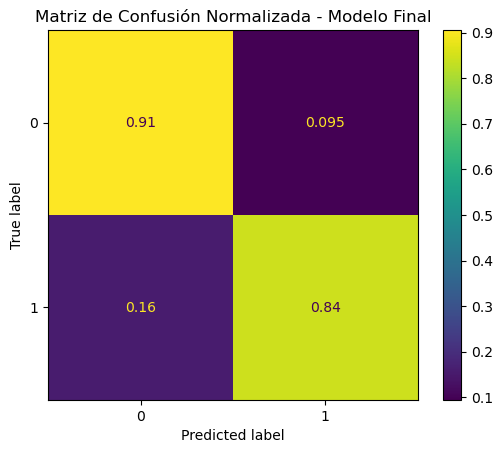

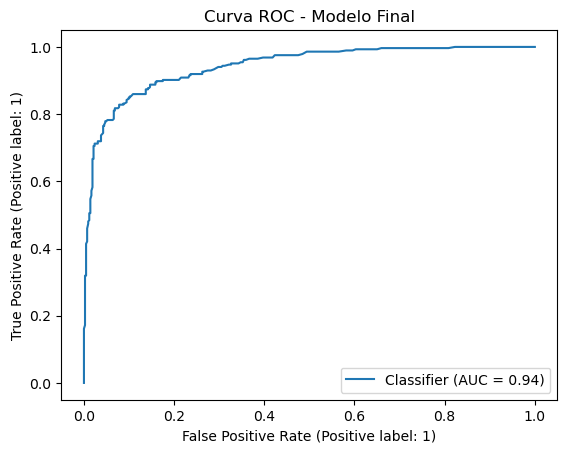

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

# Reporte de clasificaci√≥n
print("\nüìä Reporte de clasificaci√≥n final:")
print(classification_report(y_test, y_pred_final))

# Matriz de confusi√≥n
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final, normalize='true')
plt.title("Matriz de Confusi√≥n Normalizada - Modelo Final")
plt.show()

# Curva ROC
RocCurveDisplay.from_predictions(y_test, y_prob_final)
plt.title("Curva ROC - Modelo Final")
plt.show()


In [32]:

# Predicciones sobre entrenamiento
y_pred_train = modelo_final_rf.predict(X_train)

# F1-score en entrenamiento
f1_entrenamiento = f1_score(y_train, y_pred_train)
print(f"üéØ F1-score en entrenamiento: {f1_entrenamiento:.4f}")

üéØ F1-score en entrenamiento: 0.9965


In [33]:
from sklearn.model_selection import cross_val_score

# Validaci√≥n cruzada sobre TODO el dataset original (X, y)
f1_validacion = cross_val_score(modelo_final_rf, X, y, cv=5, scoring='f1', n_jobs=-1)
print(f"üß™ F1-score validaci√≥n cruzada: {f1_validacion.mean():.4f} ¬± {f1_validacion.std():.4f}")

üß™ F1-score validaci√≥n cruzada: 0.7089 ¬± 0.0309


In [35]:
pipeline = Pipeline([
    ('preprocesamiento', preprocesador),
    ('modelo', RandomForestClassifier(random_state=42))
])

param_grid = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__max_depth': [10, 15, 20],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4],
    'modelo__max_features': ['sqrt', 0.5],
}

grid = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Mejores par√°metros:", grid.best_params_)
print("Mejor F1 en validaci√≥n:", grid.best_score_)

Mejores par√°metros: {'modelo__max_depth': 20, 'modelo__max_features': 0.5, 'modelo__min_samples_leaf': 1, 'modelo__min_samples_split': 2, 'modelo__n_estimators': 200}
Mejor F1 en validaci√≥n: 0.8216173210905546


In [37]:
# Modelo final con los mejores hiperpar√°metros
modelo_seleccionado = Pipeline([
    ('preprocesamiento', preprocesador),
    ('modelo', RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        max_features=0.5,
        min_samples_leaf=1,
        min_samples_split=2,
        class_weight=None,
        random_state=42
    ))
])


# Entrenamiento final
modelo_seleccionado.fit(X_train, y_train)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['EDAD', 'HORA']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['DISTRITO', 'TIPO PERSONA',
                                                   'VEH√çCULO', 'DIA',
                                                   'TIPO DE V√çA',
                                                   'ZONIFICACI√ìN',
                                                   'CARACTER√çSTICAS DE V√çA',
                                                   'ESTADO MODALIDAD'])])),
                ('modelo',
                 RandomForestClassifier(max_depth=20, max_features=0.5,
                                        n_estimators=200, random_state=42))])

In [38]:
y_pred_final = modelo_seleccionado.predict(X_test)
y_prob_final = modelo_seleccionado.predict_proba(X_test)[:, 1]

print("\nüìä Reporte de clasificaci√≥n final:")
print(classification_report(y_test, y_pred_final))


üìä Reporte de clasificaci√≥n final:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       423
           1       0.86      0.83      0.85       285

    accuracy                           0.88       708
   macro avg       0.88      0.87      0.87       708
weighted avg       0.88      0.88      0.88       708



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [39]:
from sklearn.model_selection import cross_val_score

# Validaci√≥n cruzada con scoring F1
f1_scores_val = cross_val_score(
    modelo_seleccionado,  
    X_train, y_train,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Resultados
print(f"üß™ F1-score validaci√≥n cruzada: {f1_scores_val.mean():.4f} ¬± {f1_scores_val.std():.4f}")

üß™ F1-score validaci√≥n cruzada: 0.8216 ¬± 0.0162


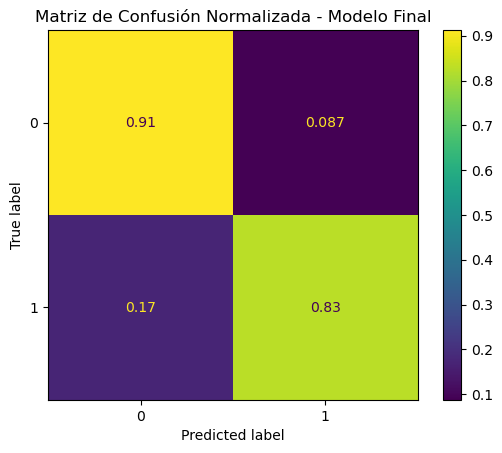

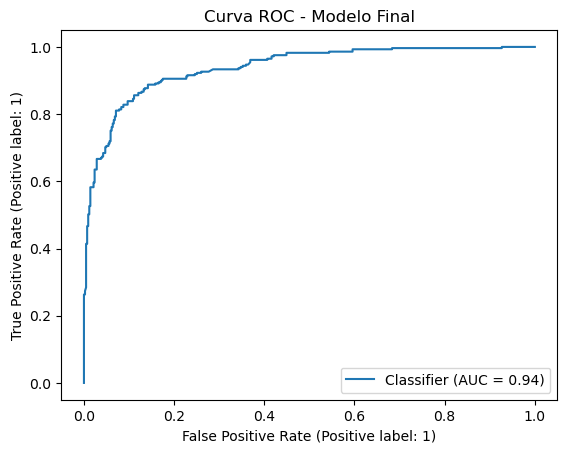

In [40]:
# Matriz de confusi√≥n
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final, normalize='true')
plt.title("Matriz de Confusi√≥n Normalizada - Modelo Final")
plt.show()

#  Curva ROC
RocCurveDisplay.from_predictions(y_test, y_prob_final)
plt.title("Curva ROC - Modelo Final")
plt.show()


c:\Users\LENOVO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


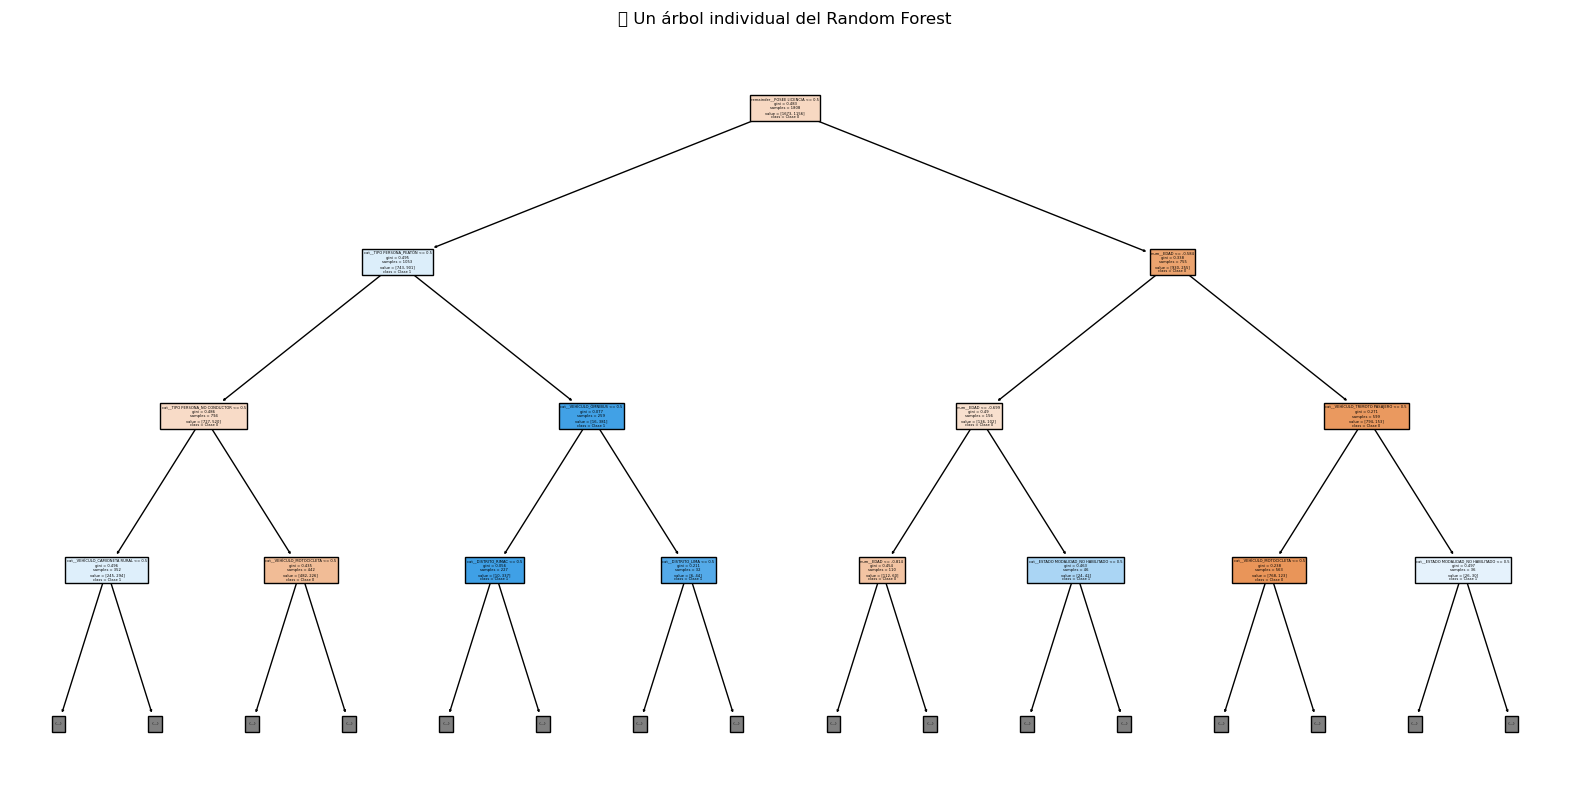

In [42]:
from sklearn.tree import plot_tree
feature_names = modelo_seleccionado.named_steps['preprocesamiento'].get_feature_names_out()

plt.figure(figsize=(20, 10))
plot_tree(
    modelo_seleccionado.named_steps['modelo'].estimators_[0],  
    feature_names=feature_names,
    class_names=['Clase 0', 'Clase 1'],
    filled=True,
    max_depth=3
)
plt.title("üå≥ Un √°rbol individual del Random Forest")
plt.show()

In [43]:
import joblib
joblib.dump(modelo_seleccionado, 'modelo_final_rf.pkl')

['modelo_final_rf.pkl']